Q1. Suppose you have a jar with 4 jelly beans: 2 are strawberry-flavored, 1 is blueberry-flavored, and 1 is cinnamon-flavored. You draw one jelly bean at random from the jar.

    a. What is the sample space for this experiment?

    b. We define event A as the jelly bean drawn is strawberry-flavored and event B as The jelly bean drawn is not cinnamon-flavored. What are the probabilities of events A and B?

    c. Are events A and B mutually exclusive? Why or why not?


In [14]:
# A1. a. Th sample space is ['Strawberry', 'Strawberry', 'Blueberry', 'Cinnamon']
#     b. P(A) = 2/4 = 0.5, P(B) = 3/4 = 0.75

#     c. A and B are NOT mutually exclusive because both A and B can occur together
#     as a jelly bean drawn can be strawberry-flavored and 'not' cinnamon-flavored at the same time
#     P(A union B) = 0.5 != 0 so A & B can't be mutually exclusive

S = ['Strawberry', 'Strawberry', 'Blueberry', 'Cinnamon']    # sample space
A = ['Strawberry']
B = ['Strawberry', 'Blueberry']    # as event B is NOT picking cinnamon-flavored beans

def P(S, A):
  ans = 0
  for i in A:
   ans += S.count(i)
  return ans / len(S)

print("P(A):", P(S, A))
print("P(B):", P(S, B))

P(A): 0.5
P(B): 0.75


 Q2. Previously, we defined a **Python function P** to compute the probability of an event using the naive definition of probability. Generalize that function to compute the probability of events when they are
 not all equally likely. Use this new function to compute the probability of events A and B from the previous exercise.

 Hint: you can pass a third argument with the probability of each event.

In [25]:
def P(S, A, prob):
  ans = 0.0
  for i in S:
    if i in A:
      ans += prob[i]
  return ans;

p_S, p_B, p_C = 0.35, 0.2, 0.1
# this is just an example (sum of prob must be = 1)
# here, 2*p_S + 1*p_B + 1*p_C = 1

S = ['Strawberry', 'Strawberry', 'Blueberry', 'Cinnamon']
prob = {'Strawberry': p_S, 'Blueberry' : p_B, 'Cinnamon' : p_C}

A = ['Strawberry']
B = ['Strawberry', 'Blueberry']

print("P(A) :", P(S, A, prob))    # should be 0.7
print("P(B) :", P(S, B, prob))    # should be 0.9

P(A) : 0.7
P(B) : 0.8999999999999999


Q3.  Use PreliZ to explore different parameters for the Gaussian distributions. Use the methods `plot_pdf`, `plot_cdf`, and `plot_interactive`. We discussed the probability mass/density functions and the cumulative density function. But there are other ways to represent functions like the percentile point function ppf. Using the `plot_ppf` method of PreliZ, plot the percentile point function for the BetaBinomial and Gaussian distributions. Can you explain how the ppf is related to the cdf and pmf/pdf?

In [46]:
!pip install pymc==5.8.0 arviz==0.16.1 bambi==0.13.0 pymc-bart==0.5.2 kulprit==0.0.1 preliz==0.3.6 nutpie==0.9.1

[None, None, None]

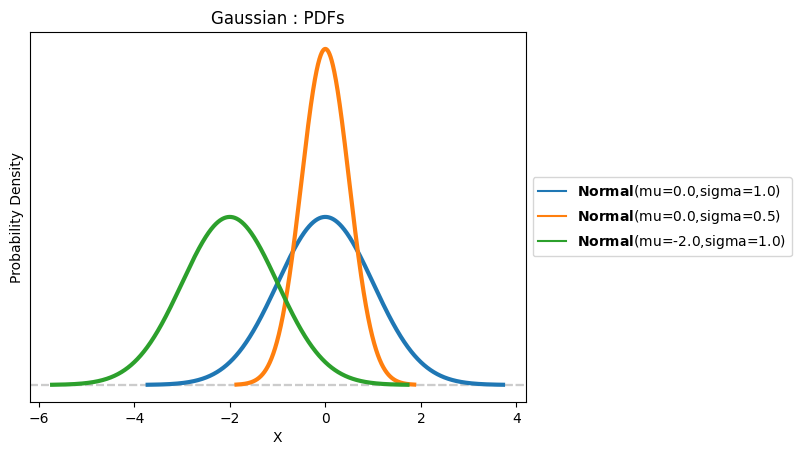

In [47]:
import preliz as pz
mu = [0.0, 0.0, -2.0]
sigma = [1, 0.5, 1]
# demo values of mu and sigma

# Plot PDFs
for i in range (0, 3):
    ax = pz.Normal(mu[i], sigma[i]).plot_pdf()

ax.set_title('Gaussian : PDFs')
ax.set_xlabel('X')
ax.set_ylabel('Probability Density')

[line.set_linewidth(3.) for line in ax.get_lines()[1::2]]

[None]

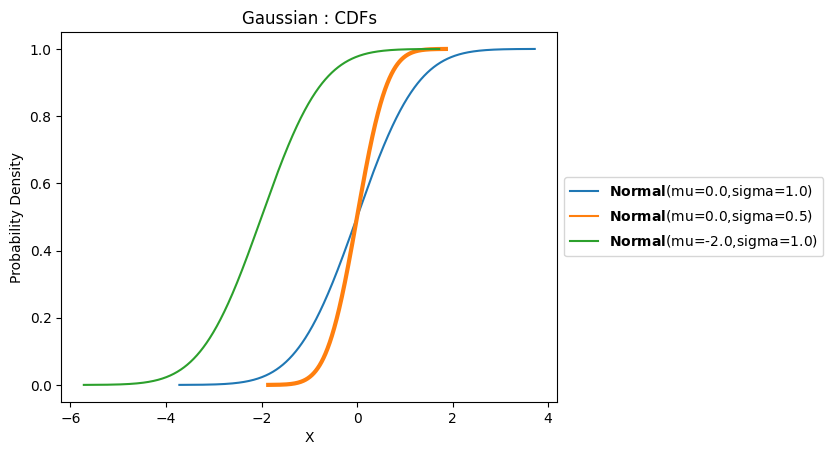

In [48]:
# Plot CDFs
for i in range (0, 3):
    ax = pz.Normal(mu[i], sigma[i]).plot_cdf()

ax.set_title('Gaussian : CDFs')
ax.set_xlabel('X')
ax.set_ylabel('Probability Density')

[line.set_linewidth(3.) for line in ax.get_lines()[1::2]]

interactive(children=(FloatSlider(value=0.2, description='mu (-inf, inf)', max=1.2, min=-0.8, step=0.01, style…

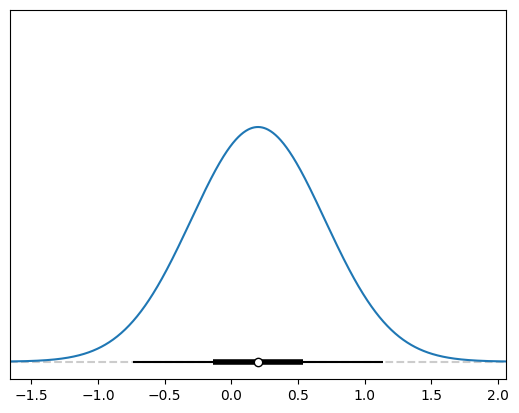

In [49]:
pz.Normal(mu=0.2, sigma=0.5).plot_interactive()

[None]

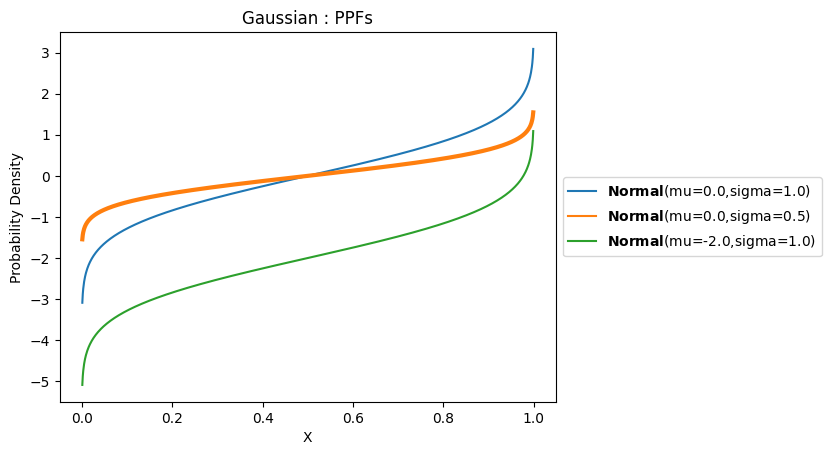

In [50]:
# Plot PPFs
for i in range (0, 3):
    ax = pz.Normal(mu[i], sigma[i]).plot_ppf()

ax.set_title('Gaussian : PPFs')
ax.set_xlabel('X')
ax.set_ylabel('Probability Density')

[line.set_linewidth(3.) for line in ax.get_lines()[1::2]]

[None]

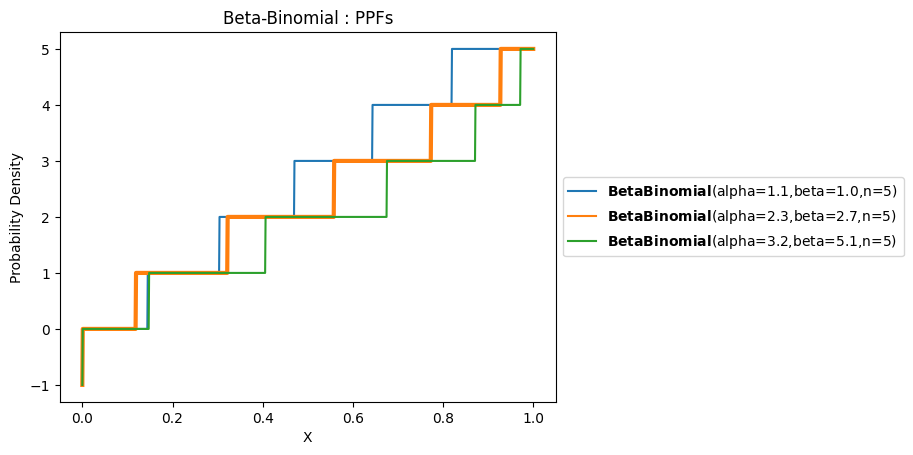

In [51]:
# Plot Beta-Binomial Curve
alpha = [1.1, 2.3, 3.2]
beta = [1.0, 2.7, 5.1]

for i in range (0, 3):
    ax = pz.BetaBinomial(alpha[i], beta[i], n=5).plot_ppf()

ax.set_title('Beta-Binomial : PPFs')
ax.set_xlabel('X')
ax.set_ylabel('Probability Density')

[line.set_linewidth(3.) for line in ax.get_lines()[1::2]]

In [52]:
# While the CDF gives the cumulative probability up to a certain value of random variable (X <= x),
# and the PDF/PMF represents the probability density/mass at each value (X = x),
# the PPF performs the reverse operation, giving the value associated with a given cumulative probability.
# It implies it is the inverse-CDF function that gives out the Random Variable associated with a given CDF.
# They are all closely related.

Q4. Use PreliZ to compute the moments for the SkewNormal distribution for a different combination of parameters. Generate random samples of different sizes,
like 10, 100, and 1,000, and see if you can recover the values of the first two moments (mean and variance) from the samples. Report your obervations.

In [59]:
# Import all the required libraries.
import numpy as np
import preliz as pz
from scipy.stats import skewnorm

# Since, parameters in SkewNormal Distribution are, scale-parameter: 'sigmas', location-parameter: 'mus', skewness: 'alphas'.
# Let's define these parameters and sample_sizes.

alphas = [0, 1, 2, 3, 4]
mus = [1, 2, -1, 0.5, 3]
sigmas = [1, 0.5, 2, 1, 0.5]    # sigma > 0, must always be satisfied.

sample_sizes = [10, 100, 1000]

def recover_sample(mu, sigma, alpha, sample_size):
    recovered_moments= []

    for size_ in sample_size:
        df = pz.SkewNormal(mu, sigma, alpha).rvs(size=size_, random_state = None)
        df_mean = np.mean(df)
        df_variance = np.var(df, ddof=1)
        recovered_moments.append((df_mean, df_variance))

    return recovered_moments

for index in range(0, 5):
    true_mean = skewnorm.stats(alphas[index], loc=mus[index], scale=sigmas[index], moments='m')
    true_variance = skewnorm.stats(alphas[index], loc=mus[index], scale=sigmas[index], moments='v')
    recovered_moments = recover_sample(mus[index], sigmas[index], alphas[index], sample_sizes)

    print(f"Taken Parameters: alpha={alphas[index]}, mu={mus[index]}, sigma={sigmas[index]}")
    print(f"Value of True moments: Mean={true_mean}, Variance={true_variance}")
    print("\nSample sizes:\n")

    for i, size in enumerate(sample_sizes):
        sample_mean, sample_variance = recovered_moments[i]
        print(f"Sample size {size}: Recovered Mean={sample_mean}, Recovered Variance={sample_variance}")

    if index <= 3:
        print("-----------------------\n")

# Observations :

# 1). The recovered mean and variance from the samples converge to the true mean and variance on increasing the sample size.
# 2). For smaller sample sizes, the recovered moments are variable to their true value, but as the sample size grows, the recovered moments become more accurate.
# 3). The accuracy of moment recovery also depends on the parameters such as (mu, sigma, aplha, tau) of the SkewNormal distribution.

Taken Parameters: alpha=0, mu=1, sigma=1
Value of True moments: Mean=1.0, Variance=1.0

Sample sizes:

Sample size 10: Recovered Mean=0.6392273647249759, Recovered Variance=0.45395804493486874
Sample size 100: Recovered Mean=0.9103178123313225, Recovered Variance=1.1911817807067173
Sample size 1000: Recovered Mean=0.9609211346656136, Recovered Variance=1.0357952873539336
-----------------------

Taken Parameters: alpha=1, mu=2, sigma=0.5
Value of True moments: Mean=2.2820947917738783, Variance=0.17042252845405234

Sample sizes:

Sample size 10: Recovered Mean=2.3881663945537976, Recovered Variance=0.1617447673793929
Sample size 100: Recovered Mean=2.2858884713121013, Recovered Variance=0.16970663218559973
Sample size 1000: Recovered Mean=2.2671358503601495, Recovered Variance=0.17147262323893114
-----------------------

Taken Parameters: alpha=2, mu=-1, sigma=2
Value of True moments: Mean=0.427299292922217, Variance=1.9628167284237392

Sample sizes:

Sample size 10: Recovered Mean=0.09